In [202]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [203]:
from sklearn.datasets import load_wine

wine_data = load_wine()
wine = wine_data.data
print(type(wine_data))
print("\n")
print(wine_data.keys())
print("\n")
print (wine_data.target_names)
print("\n")
print (wine_data.feature_names)
print("\n")
print (wine_data.target)
print("\n")


<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


['class_0' 'class_1' 'class_2']


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]




In [204]:
data = np.c_[wine_data['data'], wine_data['target']]
columns = wine_data['feature_names'] + ['target']
dataset = pd.DataFrame(data, columns=columns)

# 데이터 타입을 float32로 설정
dataset = dataset.astype('float32')

# 상위 5개 행을 출력
print(dataset)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43          15.600000      127.0           2.80   
1      13.20        1.78  2.14          11.200000      100.0           2.65   
2      13.16        2.36  2.67          18.600000      101.0           2.80   
3      14.37        1.95  2.50          16.799999      113.0           3.85   
4      13.24        2.59  2.87          21.000000      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45          20.500000       95.0           1.68   
174    13.40        3.91  2.48          23.000000      102.0           1.80   
175    13.27        4.28  2.26          20.000000      120.0           1.59   
176    13.17        2.59  2.37          20.000000      120.0           1.65   
177    14.13        4.10  2.74          24.500000       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

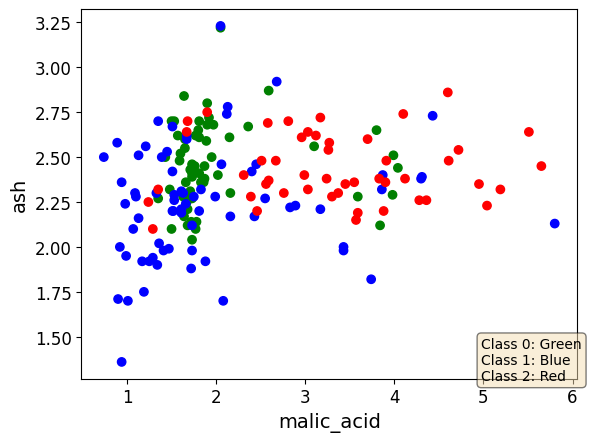

In [205]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 데이터와 타겟 인덱스 설정
x_index = 1
y_index = 2
target_names = wine_data['target_names']
feature_names = wine_data['feature_names']

# 클래스 설명
class_descriptions = {
    'Class 0': 'Green',
    'Class 1': 'Blue',
    'Class 2': 'Red'
}

# 컬러 맵 생성: 녹색, 파랑, 빨강
cmap = ListedColormap(['green', 'blue', 'red'])

# 산점도 플롯 생성
scatter = plt.scatter(wine[:, x_index], wine[:, y_index], c=wine_data['target'], cmap=cmap)

# 축 레이블 추가
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])

# 설명 박스 추가
textstr = '\n'.join([f"{name}: {desc}" for name, desc in class_descriptions.items()])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.75, 0.1, textstr, transform=plt.gcf().transFigure, fontsize=10, verticalalignment='bottom', bbox=props)

# 플롯 보여주기
plt.show()

In [206]:
# 필요한 특성명을 리스트로 정의
features = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'
]

# 특성 데이터만 추출
X = dataset.loc[:, features].values

# 특성 데이터 표준화
X_standardized = StandardScaler().fit_transform(X)

# 목표 변수 추출
target = dataset['target']

# 결과 확인
print("Standardized features:")
print("Target variable:")
print(target)  # 목표 변수 출력

Standardized features:
Target variable:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float32


In [207]:
def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1] #ascending
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

<Axes: xlabel='X1', ylabel='X2'>

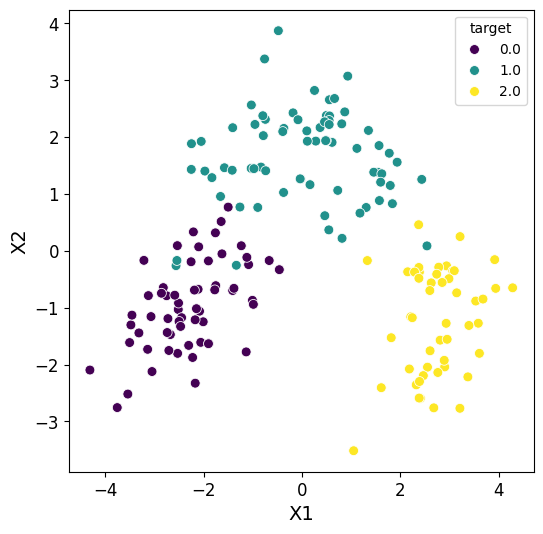

In [208]:
#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['X1','X2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'X1',y = 'X2' , hue = 'target' , s = 50 , palette= 'viridis')

In [209]:
centers = np.array([[-2, -1], [0,2], [3, -2]])

from sklearn.cluster import KMeans

kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)

X = mat_reduced

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# With default values when K = 3
# The KMeans class applies an optimized algorithm by default.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

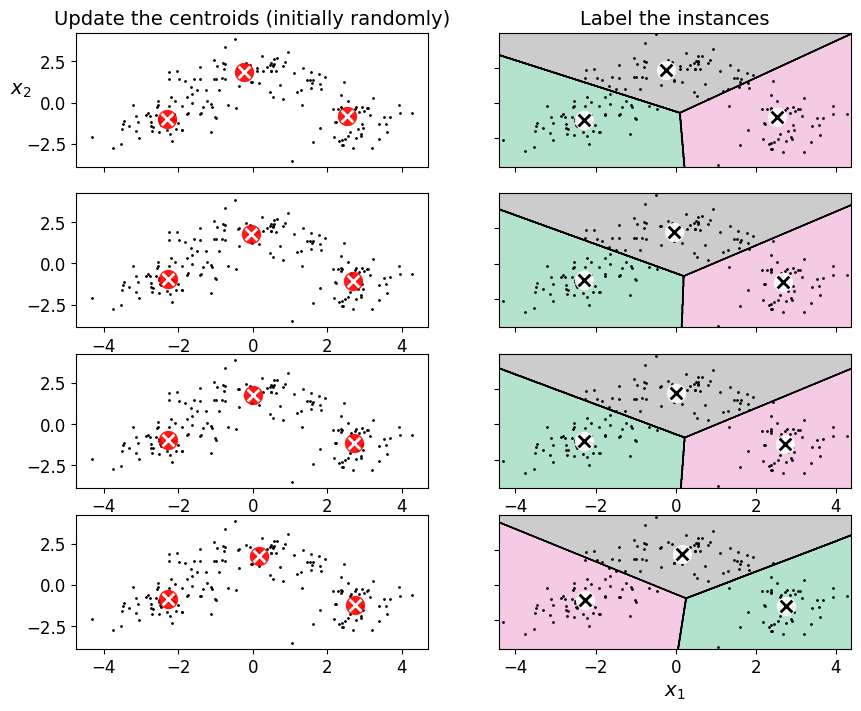

In [210]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

#####################################################


plt.figure(figsize=(10, 8))

plt.subplot(421)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(422)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(423)
plot_data(X)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(424)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(425)
plot_data(X)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(426)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.subplot(427)
plot_data(X)
plot_centroids(kmeans.cluster_centers_, circle_color='r', cross_color='w')

plt.subplot(428)
plot_decision_boundaries(kmeans, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

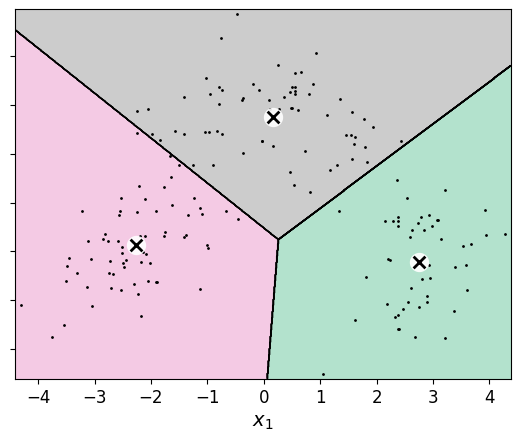

In [211]:
plot_decision_boundaries(kmeans, X, show_ylabels=False)